The gradient descent algorithm and its variants is one of the most widely used optimization algorithms in machine learning today. In this post a super simple example of gradient descent will be implemented.

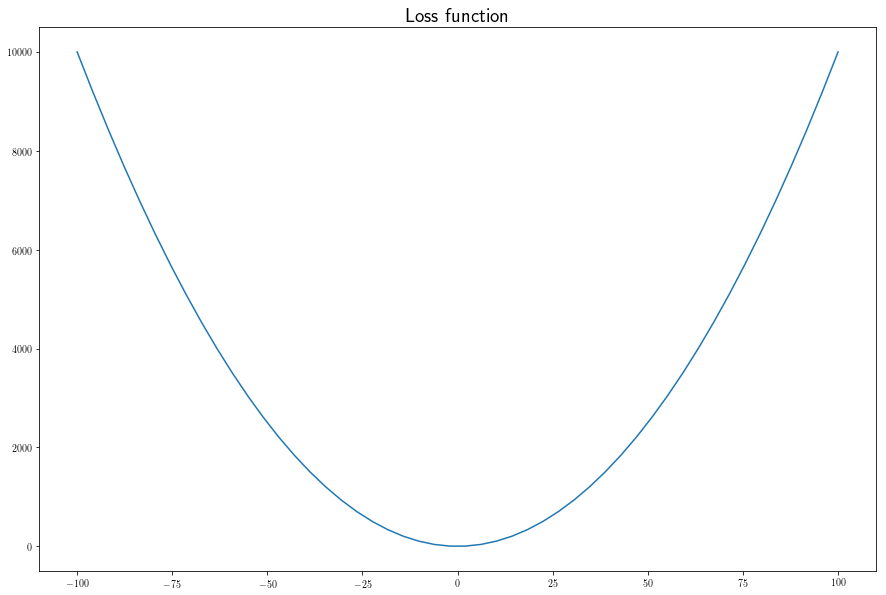

In [75]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

T = 100

L = lambda x: x**2
theta = np.linspace(-T, T)


fig = plt.figure(0, figsize=(15, 10))
_ = plt.plot(theta, L(theta))
_ = plt.title('Loss function', size=20)

The derivative of $L(\theta)=\theta^2$ wrt. x is $\frac{\partial}{\partial \theta}L(\theta)=2\theta$. The gradient descent algorithm goes as follow:


1. **Initiate** $\theta_0\in\mathbb{R}, \eta\in\mathbb{R}$.

    1.1. **Update**: $\theta_{t+1} = \theta_t - \eta L'(\theta_t)$.
    
    1.2. **Stop**: If stopping criterium is satisfied.
    
Below we will run the algorithm in Python for T iterations.

In [76]:
# Save the results
theta_ = np.zeros(T)
dL = lambda x : 2 * x


# The alogrithm
theta_[0] = T
eta = 0.3

for t in range(T-1):
    theta_[i + 1] = theta_[i] - eta * dL(theta_[i])

## Results

Lets plot the path of the gradient descent algorithm.

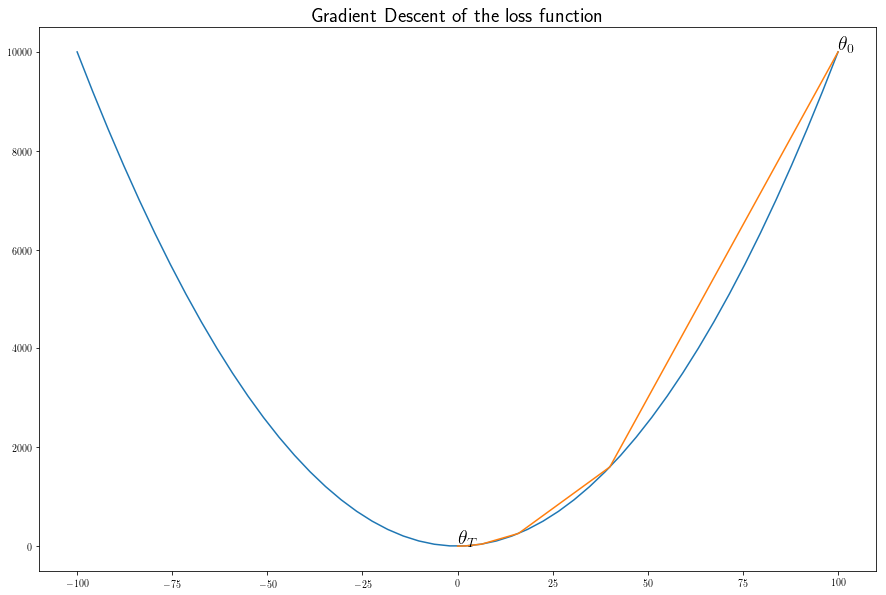

In [77]:
fig = plt.figure(1, figsize=(15, 10))
plt.rc('text', usetex=True)
_ = plt.plot(theta, L(theta))
_ = plt.plot(theta_, L(theta_))
_ = plt.text(theta_[0], L(theta_[0]), r'$\theta_0$', size = 20)
_ = plt.text(theta_[-1], L(theta_[-1]), r'$\theta_T$', size = 20)
_ = plt.title('Gradient Descent of the loss function', size=20)

## Intuition

The intuition of gradient descent is that in each iteration of the **update** step one does a local linear approximation of the loss function, a 1st order Taylor expansion of $L(\theta+d)$ around $d=0$, that is for $d\in\mathbb{R}, \theta_t\in\mathbb{R}$

$$
\begin{align}
    L(\theta_t+d) &\approx L(\theta_t) + \frac{\partial L(\theta_t+d)}{\partial d}(0) \cdot (d - 0) \\
    &= L(\theta_t) + \frac{\partial (\theta_t + d)}{\partial d}(0) \frac{\partial L(x)}{\partial x}(\theta_t+0) \cdot (d - 0)  && \text{Chain rule.} \\
    &= L(\theta_t) + \frac{\partial L(x)}{\partial x} (\theta_t) \cdot d
\end{align}
$$

Using this local approximation one sees that $L$ minimized in the direction of the negative gradient $d=-\frac{\partial L(x)}{\partial x} (\theta_t)$

## Higher Dimensions

This also holds in higher dimensions where the approximation is $d\in\mathbb{R^d}, \theta_t\in\mathbb{R^d}$

$$
\begin{align}
    L(\theta_t+d) \approx L(\theta_t) + \nabla L(\theta_t)^T d
\end{align}
$$

Restricting $\| d\|=1$ then one can see by Cauchy-Schwarz inequality that

$$
\begin{align}
    \nabla L(\theta_t)^T d & \geq - \lvert \nabla L(\theta_t)^T d \lvert \\
    & \geq - \| \nabla L(\theta_t) \| \| d \| && \text{Cauchy Schwarz.} \\
        &= \nabla L(\theta_t)^T\frac{- \nabla L(\theta_t)}{\|\nabla L(\theta_t)\|}
\end{align}
$$

So $ \nabla L(\theta_t)^T d \geq \nabla L(\theta_t)^T d^*$ where $d^*=\frac{- \nabla L(\theta_t)}{\|\nabla L(\theta_t)\|}$, therefore $- \nabla L(\theta_t)$ is the local direction which minimizes the loss function. 

Gradient descent applies this local approximation and moves along the negative gradient in each iteration. 

$$
\theta_{t+1} = \theta_t - \eta L'(\theta_t)
$$

The $\eta$ is called the *learning rate*. It is a tuning parameter, that controls how far the algorithm moves along the negative gradient.